# More practice with pandas


### Objective of this notebook
Using the same dataset that we used in Colab_Lec03, let's practice more data exploration.

In [70]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Read in the movie data set
movie_filepath = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/top_movies_2020.csv'
movies_df = pd.read_csv(movie_filepath)
movies_df.head()

,Title,Gross,Gross (Adjusted),Year
0,Gone with the Wind,200852579,1895421694,1939
1,Star Wars: Episode IV - A New Hope,460998507,1668979715,1977
2,The Sound of Music,159287539,1335086324,1965
3,E.T. the Extra-Terrestrial,435110554,1329174791,1982
4,Titanic,659363944,1270101626,1997


Recall, how do you find out information and details of your dataset?

In [ ]:
## What is the size of the table?
print("Size of the table", movies_df.shape)

## What are the data type of each of the columns in the table?
print("Data type in the table", movies_df.dtypes)

## How many missing values are in each column?
print("Missing values in table column", movies_df.isnull().sum())

Size of the table (200, 4)
Data type in the table Title               object
Gross                int64
Gross (Adjusted)     int64
Year                 int64
dtype: object
Missing values in table column Title               0
Gross               0
Gross (Adjusted)    0
Year                0
dtype: int64


## Questions to find the next blockbuster
Let's get some information about trends in movie's gross to decide which movie were popular and high grossing so we can make a pitch for the next blockbuster. Use either tables or plots to answer the following questions.

In [ ]:
## Q1: What was the max Gross and Gross adj from any movie?
## df.column.max() will return for you max value in the column you specify

print("Max Gross", movies_df.Gross.max())
print("Max Gross adjusted",  movies_df['Gross (Adjusted)'].max())
## Q2: Are they the same movie?
## You can look at the index that has your row of interest by setting == to the max value
print(movies_df[movies_df.Gross == movies_df.Gross.max()])
print(movies_df[movies_df['Gross (Adjusted)'] == movies_df['Gross (Adjusted)'].max()])

936662225
1895421694
                                         Title      Gross  Gross (Adjusted)  \
10  Star Wars: Episode VII - The Force Awakens  936662225        1013038487   

    Year  
10  2015  
                Title      Gross  Gross (Adjusted)  Year
0  Gone with the Wind  200852579        1895421694  1939


In [ ]:
## Q2: What was the top performing movie for each decade?
## Using groupby allows us to group together rows within a column
movies_df.groupby(movies_df.Year // 10 * 10).max()


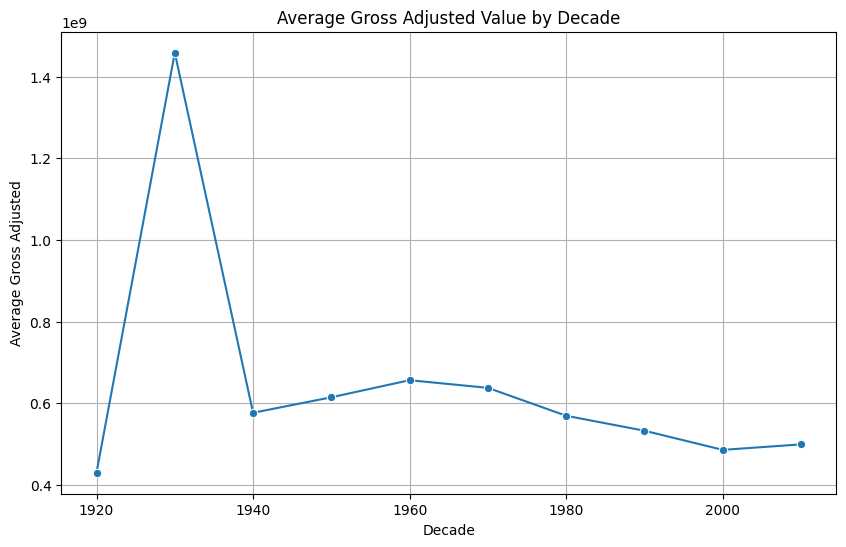

In [77]:
## Q3: To ask if people watch movies more now then in the pass, we are going to ask over the years, is there a difference in the Gross adj over time?
import pandas as pd

# Create a 'decade' column
movies_df['Decade'] = (movies_df['Year'] // 10) * 10

# Group by the 'Decade' column and count the number of rows in each decade
decade_counts = movies_df.groupby('Decade').size().reset_index(name='count')

#Group by 'Decade' and return the average 'Gross (Adjusted)'
decade_avg_gross = movies_df.groupby('Decade')['Gross (Adjusted)'].mean().reset_index(name='average_gross')
decade_avg_gross

# ## We can do a simple plot of the average to see the trend of Gross adjusted
plt.figure(figsize=(10, 6))
sns.lineplot(x='Decade', y='average_gross', data=decade_avg_gross, marker='o', linestyle='-')

plt.title('Average Gross Adjusted Value by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Gross Adjusted')
plt.grid(True)
plt.show()

In [78]:
## Q4: In addition, are there more top titles being release now compared to the past years?
decade_counts

,Decade,count
0,1920,1
1,1930,2
2,1940,7
3,1950,13
4,1960,19
5,1970,25
6,1980,21
7,1990,29
8,2000,39
9,2010,44


What other information do you wish this table included that would have helped us find that next new movie?

# Working with tsv
Pandas is able to work with tab-delimited files as well as comma-delimited files. In the case of tab-delimited, we need to specify the delimiter by using the 'sep' keyword argument.

In [ ]:
euk_filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
euk_df = pd.read_csv(euk_filepath, sep='\t')
euk_df.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200,37660,2010,Chromosome


In [79]:
## Let's start with getting some information about our table. What is a quick way to do so?
euk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   object 
 1   Kingdom             8302 non-null   object 
 2   Class               8302 non-null   object 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 8302 non-null   object 
 5   Number of genes     8302 non-null   object 
 6   Number of proteins  8302 non-null   object 
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 583.9+ KB


In [80]:
## I want to narrow down my tables to only include Fungi, how would I go about that?
euk_df[(euk_df['Kingdom'] == 'Fungi')]

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
8,Saccharomyces cerevisiae S288C,Fungi,Ascomycetes,12.157100,38.1556,6445,6002,1999,Complete Genome
10,Pneumocystis carinii B80,Fungi,Ascomycetes,7.661460,27.8,3695,3646,2015,Contig
11,Schizosaccharomyces pombe,Fungi,Ascomycetes,12.591300,36.0381,6974,5132,2002,Chromosome
12,Aspergillus nidulans FGSC A4,Fungi,Ascomycetes,30.276000,50.2721,9586,9556,2003,Scaffold
13,Aspergillus fumigatus Af293,Fungi,Ascomycetes,29.385000,49.8105,19832,19260,2005,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


In [81]:
## Let's further narrow down the table to look at Funggi that has genome size > 100. How many specimens remain?
euk_df[(euk_df.Kingdom == 'Fungi') &
    (euk_df['Size (Mb)'] > 100)
    ]

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
323,Blumeria graminis f. sp. hordei DH14,Fungi,Ascomycetes,124.489,43.5,-,-,2018,Scaffold
347,Puccinia triticina 1-1 BBBD Race 1,Fungi,Basidiomycetes,135.344,36.8,15539,15685,2009,Scaffold
354,Tuber melanosporum,Fungi,Ascomycetes,124.946,44.9,7496,7496,2010,Scaffold
372,Puccinia striiformis f. sp. tritici,Fungi,Basidiomycetes,156.834,44.4,-,-,2018,Contig
427,Melampsora larici-populina 98AG31,Fungi,Basidiomycetes,101.129,41.3,16380,16372,2011,Scaffold
...,...,...,...,...,...,...,...,...,...
6406,Rhizophagus irregularis,Fungi,Other Fungi,131.335,25.8,24574,24485,2016,Scaffold
6502,Rhizophagus irregularis,Fungi,Other Fungi,211.467,-,-,-,2018,Scaffold
6511,Rhizophagus irregularis,Fungi,Other Fungi,156.891,-,-,-,2018,Scaffold
6520,Puccinia striiformis,Fungi,Basidiomycetes,144.837,44.2,-,-,2019,Scaffold


In [84]:
## Which species are in our table, that is Fungi with genome size > 100 Mb
euk_df[(euk_df.Kingdom == 'Fungi') & (euk_df['Size (Mb)'] > 100)].Species

,Species
323,Blumeria graminis f. sp. hordei DH14
347,Puccinia triticina 1-1 BBBD Race 1
354,Tuber melanosporum
372,Puccinia striiformis f. sp. tritici
427,Melampsora larici-populina 98AG31
...,...
6406,Rhizophagus irregularis
6502,Rhizophagus irregularis
6511,Rhizophagus irregularis
6520,Puccinia striiformis


Next class we will do some more data exploration